In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import os

In [2]:
os.getcwd()

'/home/vno/pythonprojects'

## Cleaning Dataframe 

In [5]:
df = pd.read_csv('data/washdash-download.csv')
df_sanitation = df[df['Service Type'] == 'Sanitation']
df_sanitation_total = df_sanitation[df_sanitation['Residence Type'] == 'total']
df_sanitation_total.to_csv('data/sanitation_data.csv')
df_sanitation_total = df_sanitation_total.drop(['Population', 'Type', 'Residence Type', 'Service Type'], axis =1)
df_sanitation_total.head()

,Region,Year,Coverage,Service level
0,Australia and New Zealand,2000,39.38183,Basic service
1,Australia and New Zealand,2000,0.00000,Limited service
2,Australia and New Zealand,2000,0.00000,Open defecation
3,Australia and New Zealand,2000,60.61081,Safely managed service
4,Australia and New Zealand,2000,0.00736,Unimproved


In [6]:
df_sanitation_spread = pd.pivot_table(df_sanitation_total, values = 'Coverage', index=['Region','Year'], columns = 'Service level').reset_index()
df_sanitation_spread.head()

Service level,Region,Year,At least basic,Basic service,Limited service,Open defecation,Safely managed service,Unimproved
0,Australia and New Zealand,2000,NaN,39.38183,0.0,0.0,60.61081,0.00736
1,Australia and New Zealand,2001,NaN,39.25925,0.0,0.0,60.73339,0.00736
2,Australia and New Zealand,2002,NaN,39.13418,0.0,0.0,60.85847,0.00735
3,Australia and New Zealand,2003,NaN,39.00791,0.0,0.0,60.98474,0.00735
4,Australia and New Zealand,2004,NaN,38.88287,0.0,0.0,61.10978,0.00735


In [7]:
df_sanitation_spread.loc[df_sanitation_spread['Basic service'].isnull(), 'Basic service'] = df_sanitation_spread['At least basic']
df_sanitation = df_sanitation_spread.drop(['At least basic'], axis = 1)
df_sanitation.head()

Service level,Region,Year,Basic service,Limited service,Open defecation,Safely managed service,Unimproved
0,Australia and New Zealand,2000,39.38183,0.0,0.0,60.61081,0.00736
1,Australia and New Zealand,2001,39.25925,0.0,0.0,60.73339,0.00736
2,Australia and New Zealand,2002,39.13418,0.0,0.0,60.85847,0.00735
3,Australia and New Zealand,2003,39.00791,0.0,0.0,60.98474,0.00735
4,Australia and New Zealand,2004,38.88287,0.0,0.0,61.10978,0.00735


In [8]:
df_sanitation['Region'].unique()

array(['Australia and New Zealand', 'Central and Southern Asia',
       'Eastern and South-Eastern Asia', 'Europe and Northern America',
       'Latin America and the Caribbean',
       'Northern Africa and Western Asia', 'Oceania',
       'Sub-Saharan Africa'], dtype=object)

In [10]:
df_sanitation.to_csv('data/sanitation_data(new).csv')

In [9]:
df_aus = df_sanitation[df_sanitation['Region'] == 'Australia and New Zealand']
df_csa = df_sanitation[df_sanitation['Region'] == 'Central and Southern Asia']
df_lac = df_sanitation[df_sanitation['Region'] == 'Latin America and the Caribbean']
df_nawa = df_sanitation[df_sanitation['Region'] == 'Northern Africa and Western Asia']
df_oce = df_sanitation[df_sanitation['Region'] == 'Oceania']
df_ssa = df_sanitation[df_sanitation['Region'] == 'Sub-Saharan Africa']

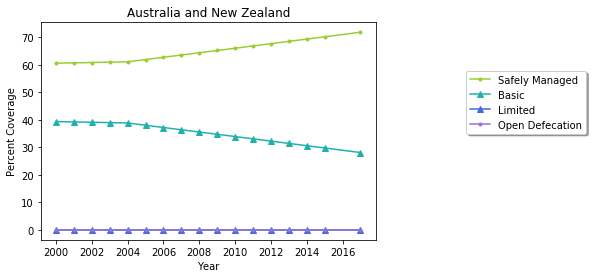

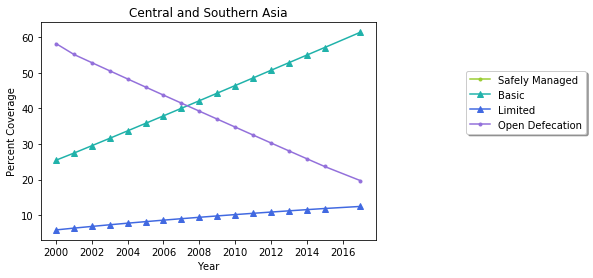

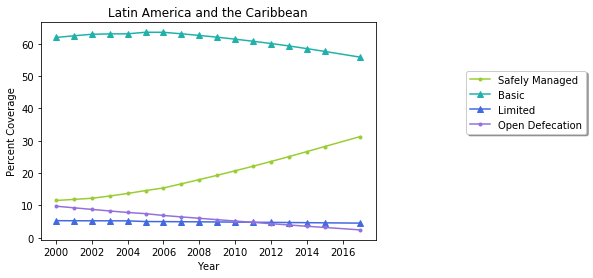

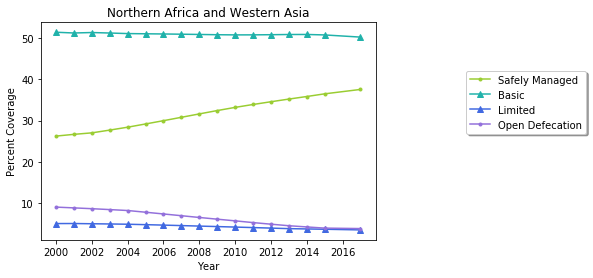

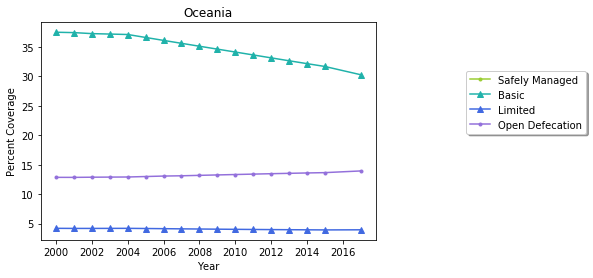

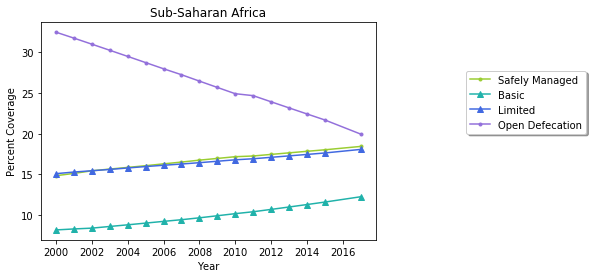

In [15]:
sdg_regions = [df_aus, df_csa, df_lac, df_nawa, df_oce, df_ssa]
sdg_region_title = ['Australia and New Zealand', 
                   'Central and Southern Asia',
                   'Latin America and the Caribbean', 
                   'Northern Africa and Western Asia', 
                   'Oceania', 
                   'Sub-Saharan Africa']
index = 0
for region in sdg_regions: 
        title = sdg_region_title[index]
        
        plt.plot(region['Year'], region['Safely managed service'], color = 'yellowgreen', marker = '.', label = "Safely Managed")
        plt.plot(region['Year'], region['Basic service'], color = 'lightseagreen', marker = '^', label = "Basic")
        plt.plot(region['Year'], region['Limited service'], color = 'royalblue', marker = '^', label = 'Limited')
        plt.plot(region['Year'], region['Open defecation'], color = 'mediumpurple', marker ='.', label = 'Open Defecation')

        plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
        plt.xticks(range(2000,2017,2))
        plt.xlabel('Year')
        plt.ylabel('Percent Coverage')
        plt.title(title)
        plt.show()
        
        image_title =  
        plt.sa
        
        index += 1